<a href="https://colab.research.google.com/github/JeffAkkerman/DataScience/blob/main/Day_98_Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Jeff Added
%pip install country_converter --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for country_converter: filename=country_converter-0.8.0-py3-none-any.whl size=55657 sha256=d8120492cb70e4a73a909747c0e901eba3d54f048cedcd74eabfeeed92bc2ab0
  Stored in directory: /root/.cache/pip/wheels/c2/5a/f6/7187fa51e18f2ed105833a7f5c44a2475ace0c96e19118e608
Successfully built country_converter


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 46.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

In [ ]:
# Jeff Added
import country_converter as coco
import plotly.graph_objects as go

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True)
df_data['Price'] = df_data['Price'].astype(str).str.replace(",", "")
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      4324 non-null   int64              
 1   Unnamed: 0.1    4324 non-null   int64              
 2   Organisation    4324 non-null   object             
 3   Location        4324 non-null   object             
 4   Date            4324 non-null   datetime64[ns, UTC]
 5   Detail          4324 non-null   object             
 6   Rocket_Status   4324 non-null   object             
 7   Price           964 non-null    float64            
 8   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
columns = df_data.columns
for col in columns:
  print(f"{df_data[col].isna().sum()} in {col}")

0 in Unnamed: 0
0 in Unnamed: 0.1
0 in Organisation
0 in Location
0 in Date
0 in Detail
0 in Rocket_Status
3360 in Price
0 in Mission_Status


In [ ]:
nan_price = df_data[df_data['Price'].isna()].sort_values('Date', ascending=True)
nan_price

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-05-12 01:16:00+00:00,Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2020-05-22 07:31:00+00:00,Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel",2020-07-06 01:00:00+00:00,Shavit-2 | Ofek-16,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success


In [ ]:
print(nan_price['Organisation'].nunique())
nan_price['Organisation'].value_counts()

49


RVSN USSR           1775
General Dynamics     251
Arianespace          183
VKS RF               168
US Air Force         135
Boeing               129
Martin Marietta      105
CASC                  93
Lockheed              71
NASA                  54
MHI                   47
ULA                   42
Sea Launch            36
ILS                   33
Roscosmos             32
ISAS                  30
US Navy               17
ISA                   13
Blue Origin           12
ESA                   12
IAI                   11
ISRO                   9
ExPace                 9
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
Land Launch            7
CASIC                  5
KCST                   5
UT                     5
JAXA                   4
Arm??e de l'Air        4
Exos                   4
CECLES                 4
SRC                    3
AEB                    3
KARI                   3
Yuzhmash               2
OKB-586                2


In [ ]:
print(df_data['Organisation'].nunique())
df_data['Organisation'].value_counts()

56


RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [ ]:
print(f"There are {len(df_data[df_data.duplicated()])} duplicate rows")
print(f"There are {len(df_data.isna().values)} NaN values in the data")

There are 0 duplicate rows
There are 4324 NaN values in the data


In [ ]:
df_data = df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Descriptive Statistics

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


In [ ]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launches_org = df_data['Organisation'].value_counts()
launches_org

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


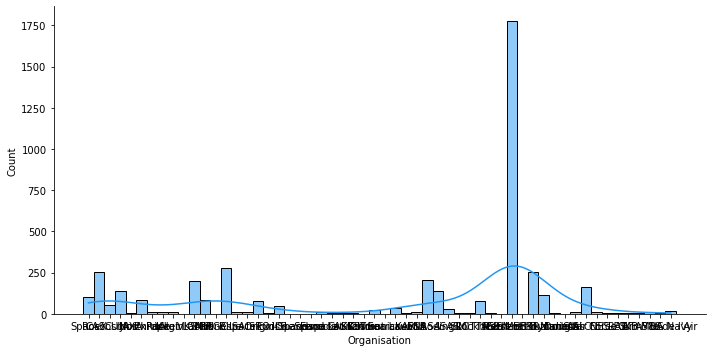

In [ ]:
sns.displot(df_data['Organisation'],
            bins=56,
            aspect=2,
            kde=True, 
            color='#2196f3')

# plt.title(f'1970s Home Values in Boston. Average: ${(1000*df_data.Organisation.mean()):.6}')
# plt.xlabel('Price in 000s')
# plt.ylabel('Nr. of Homes')

plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
df_data['Rocket_Status'].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
df_data['Mission_Status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
print(f"{round(3879 / 4324 * 100, 3)}% of missions were successful.")

89.709% of missions were successful.


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
price = df_data[df_data["Price"].notnull()].sort_values(by=["Price"])
price

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
102,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2019-09-19 06:42:00+00:00,Long March 11 | Zhuhai-1 Group 03,StatusActive,5.30,Success
281,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2018-01-19 04:12:00+00:00,"Long March 11 | Jilin-1 07, 08 & Others",StatusActive,5.30,Success
26,CASC,"Xichang Satellite Launch Center, China",2020-05-29 20:13:00+00:00,Long March 11 | XJS-G and XJS-H,StatusActive,5.30,Success
176,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2018-12-21 23:51:00+00:00,Long March 11 | Hongyun-1,StatusActive,5.30,Success
487,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2015-09-25 00:00:00+00:00,Long March 11 | Pujian 1 & Others,StatusActive,5.30,Success
...,...,...,...,...,...,...,...
3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-03-03 16:00:00+00:00,Saturn V | Apollo 9,StatusRetired,"1,160.00",Success
3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-11-14 16:22:00+00:00,Saturn V | Apollo 12,StatusRetired,"1,160.00",Success
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-07-16 13:32:00+00:00,Saturn V | Apollo 11,StatusRetired,"1,160.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15 17:30:00+00:00,Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success


In [ ]:
2020-1964

56

In [ ]:
price["Price"].nunique()

56

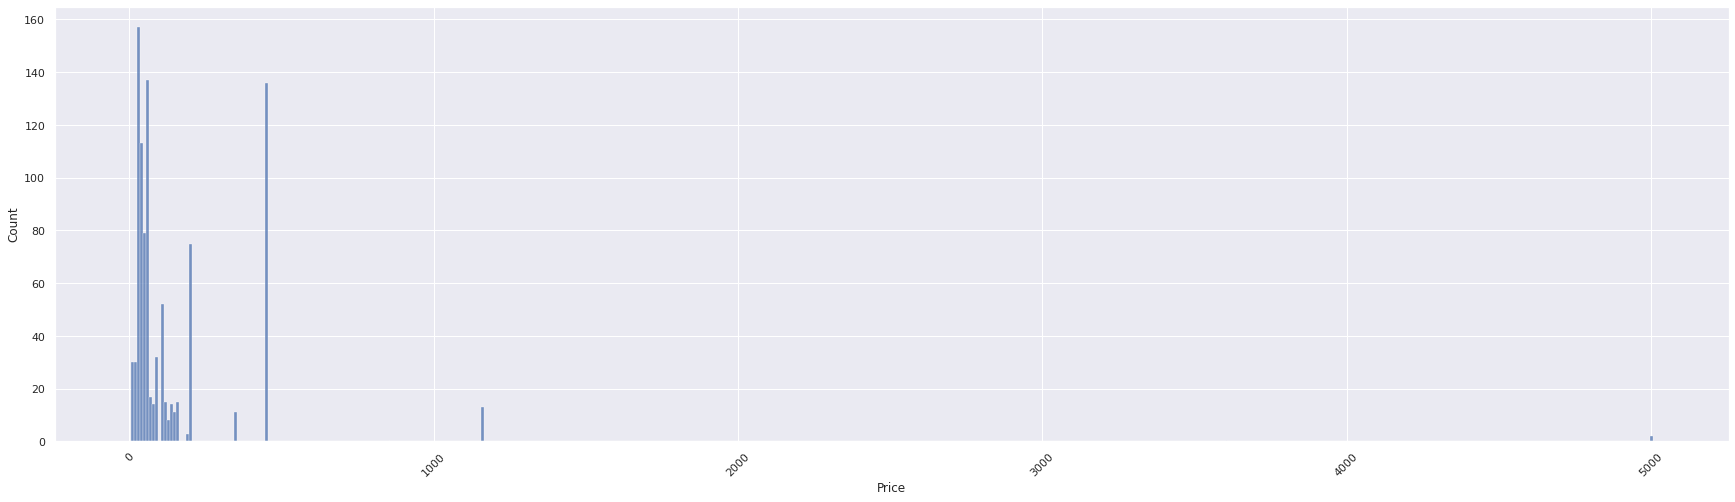

In [ ]:
sns.set(rc={'figure.figsize':(30,8)})
plt.xticks(rotation=45)
sns.histplot(price, binwidth=10, x="Price")

In [ ]:
fig = px.histogram(price,
                   x="Date",
                   color="Price",
                  #  histnorm="Price",
                   opacity=0.6,
                   barmode="overlay",
                   nbins=964,
                  #  marginal='box',
                   )

fig.update_layout(xaxis_title="Date",
                  yaxis_title="Price in $Millions (USD)")

fig.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
print(df_data['Location'].nunique())
df_data['Location'].value_counts()

137


Site 31/6, Baikonur Cosmodrome, Kazakhstan               235
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   202
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Jiuquan Satellite Launch Center, China                     1
LP-41, Kauai, Pacific Missile Range Facility               1
Tai Rui Barge, Yellow Sea                                  1
Launch Plateform, Shahrud Missile Test Site                1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Name: Location, Length: 137, dtype: int64

In [ ]:
df_data['Launches'] = 1
df_data['Launches'] = pd.to_numeric(df_data['Launches'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
 7   Launches        4324 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 270.4+ KB


In [ ]:
# Modified Benny's suggestion to make the 7 substitutions

codes = {
    "Russia": "Russia",
    "New Mexico":"USA",
    "Yellow Sea":"China",
    "Shahrud Missile Test Site":"Iran",
    "Pacific Missile Range Facility":"USA",
    "Barents Sea":"Russia",
    "Gran Canaria":"USA"
}

keys = codes.keys()

# print(codes["Russia"])

new_locations = []

locations = df_data["Location"]

for location in locations:
    for key in keys:
      if key in location:
        try:
            location = codes[key]
        except:
            pass
    new_locations.append(location)

print(len(new_locations))
print(df_data.shape)

df_data.insert(2, 'Country', new_locations, True)
# df_data["Country"] = new_locations # For some reason this isn't working so using insert instead ^^^^^

4324
(4324, 8)


In [ ]:
df_data["Location"].equals(df_data['Country'])
# df_data.loc[df_data['Country'] == "Tai Rui Barge, Yellow Sea"]
# df_data['Location'].value_counts()

False

In [ ]:
df_data['Country']

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Country, Length: 4324, dtype: object

In [ ]:
# create a column with the country name which can then be converted to the country ISO code
country_only = []

countries = df_data["Country"]

for country in countries:
    rename = country.split(",")
    try:
        rename = rename[-1].lstrip()
    except:
        pass
    country_only.append(rename)

print(len(country_only))
df_data["Country"] = country_only
df_data['Country'].value_counts()

4324


Russia           1398
USA              1351
Kazakhstan        701
France            303
China             269
Japan             126
India              76
Pacific Ocean      36
Iran               14
New Zealand        13
Israel             11
Kenya               9
Australia           6
North Korea         5
South Korea         3
Brazil              3
Name: Country, dtype: int64

In [ ]:
df_data

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ


In [ ]:
# Convert country names into their Alpha 3 ISO code https://pypi.org/project/country-converter/
cc = coco.CountryConverter()

countries = df_data["Country"]
iso = cc.pandas_convert(series=countries, to='ISO3')
df_data['ISO'] = iso

df_data['ISO'].value_counts()

RUS          1398
USA          1351
KAZ           701
FRA           303
CHN           269
JPN           126
IND            76
not found      36
IRN            14
NZL            13
ISR            11
KEN             9
AUS             6
PRK             5
KOR             3
BRA             3
Name: ISO, dtype: int64

In [ ]:
df_launches = df_data.groupby(['ISO', "Country"], as_index=False).sum()
df_launches = df_launches.sort_values(by="Launches", ascending=False)
df_launches

,ISO,Country,Price,Launches
13,RUS,Russia,"2,189.30",1398
14,USA,USA,"105,287.32",1351
8,KAZ,Kazakhstan,"12,150.50",701
3,FRA,France,"16,285.00",303
2,CHN,China,"6,368.56",269
7,JPN,Japan,"3,700.50",126
4,IND,India,"2,177.00",76
15,not found,Pacific Ocean,0.00,36
5,IRN,Iran,0.00,14
11,NZL,New Zealand,97.50,13


In [ ]:
world_map = px.choropleth(df_launches,
                          locations="ISO",
                          color='Launches',
                          hover_name='Country', # column to add to hover information
                          color_continuous_scale=px.colors.sequential.matter)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
df_data['Mission_Status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
df_failures = df_data[df_data["Mission_Status"] != "Success"]
df_failures = df_failures.groupby(['ISO'], as_index=False).count()
df_failures = df_failures.sort_values(by="Organisation", ascending=False)
df_failures

,ISO,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches
13,USA,163,163,163,163,163,163,28,163,163
8,KAZ,93,93,93,93,93,93,3,93,93
12,RUS,93,93,93,93,93,93,3,93,93
2,CHN,25,25,25,25,25,25,7,25,25
3,FRA,18,18,18,18,18,18,3,18,18
4,IND,13,13,13,13,13,13,8,13,13
7,JPN,13,13,13,13,13,13,0,13,13
5,IRN,9,9,9,9,9,9,0,9,9
0,AUS,3,3,3,3,3,3,0,3,3
1,BRA,3,3,3,3,3,3,0,3,3


In [ ]:
world_map = px.choropleth(df_failures,
                          locations="ISO",
                          color='Organisation',
                          hover_name='Country', # column to add to hover information
                          color_continuous_scale=px.colors.sequential.matter)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
df_data

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Launches
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,1
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,1
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,1


In [ ]:
fig = px.sunburst(
    df_data,
    path=['Country', 'Organisation', 'Mission_Status'],
    values='Launches',
    title='Where do Spacemissions Launch?',
    )

fig.update_layout(xaxis_title='Number of Launches',
                  yaxis_title='Country',
                  coloraxis_showscale=False,
                  )

fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Country         4324 non-null   object             
 3   Date            4324 non-null   datetime64[ns, UTC]
 4   Detail          4324 non-null   object             
 5   Rocket_Status   4324 non-null   object             
 6   Price           964 non-null    float64            
 7   Mission_Status  4324 non-null   object             
 8   ISO             4324 non-null   object             
 9   Launches        4324 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 337.9+ KB


In [ ]:
df_total_price = df_data
df_total_price = df_total_price.dropna()
df_total_price.isna().values.any()

False

In [ ]:
# Because the price column is an object type (String) it doesn't drop the nan values because they are the string "nan"
df_total_price = df_total_price[df_total_price['Price'] != 'nan']

In [ ]:
df_total_price['Price'] = df_total_price['Price'].astype(str).str.replace(",", "")
df_total_price['Price'] = pd.to_numeric(df_total_price['Price'])
df_total_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    964 non-null    object             
 1   Location        964 non-null    object             
 2   Country         964 non-null    object             
 3   Date            964 non-null    datetime64[ns, UTC]
 4   Detail          964 non-null    object             
 5   Rocket_Status   964 non-null    object             
 6   Price           964 non-null    float64            
 7   Mission_Status  964 non-null    object             
 8   Launches        964 non-null    int64              
 9   ISO             964 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 82.8+ KB


In [ ]:
df_total_price = df_total_price.groupby(['Organisation'], as_index=False).sum()
df_total_price = df_total_price.sort_values(by="Price", ascending=False)
df_total_price

,Organisation,Price,Launches
14,NASA,"76,280.00",149
0,Arianespace,"16,345.00",96
21,ULA,"14,798.00",98
16,RVSN USSR,"10,000.00",2
2,CASC,"6,340.26",158
20,SpaceX,"5,444.00",99
15,Northrop,"3,930.00",83
12,MHI,"3,532.50",37
8,ISRO,"2,177.00",67
22,US Air Force,"1,550.92",26


In [ ]:
bar = px.bar(x=df_total_price['Price'],
             y=df_total_price['Organisation'],
             orientation='h',
             labels=df_total_price['Organisation'],
             title="Total Money Spent by Organisation in Millions",
             color=df_total_price['Price'],
             color_continuous_scale='Aggrnyl')
bar.update_layout(xaxis_title='Organisation',
                  yaxis_title='Money Spent in Millions',
                  coloraxis_showscale=False,
                  )
bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_launch_price = df_total_price
# df_launch_price = df_launch_price.groupby(['Organisation'], as_index=False).sum()
df_launch_price["Avg_Price"] = df_launch_price["Price"] / df_launch_price["Launches"]
df_launch_price = df_launch_price.sort_values(by="Avg_Price", ascending=False)
df_launch_price

,Organisation,Price,Launches,Avg_Price
16,RVSN USSR,"10,000.00",2,"5,000.00"
14,NASA,"76,280.00",149,511.95
1,Boeing,"1,241.00",7,177.29
0,Arianespace,"16,345.00",96,170.26
21,ULA,"14,798.00",98,151.00
7,ILS,"1,320.00",13,101.54
12,MHI,"3,532.50",37,95.47
13,Martin Marietta,721.40,9,80.16
22,US Air Force,"1,550.92",26,59.65
9,JAXA,168.00,3,56.00


In [ ]:
bar = px.bar(x=df_launch_price['Avg_Price'],
             y=df_launch_price['Organisation'],
             orientation='h',
             labels=df_launch_price['Organisation'],
             title="Average Money Spent per Launch by Organisation in Millions",
             color=df_launch_price['Avg_Price'],
             color_continuous_scale='Aggrnyl')
bar.update_layout(xaxis_title='Organisation',
                  yaxis_title='Avg Cost per Launch Spent in Millions',
                  coloraxis_showscale=False,
                  autosize=False,
                  width=1800,
                  height=900,
                  )

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500,
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),

bar.show()

# Chart the Number of Launches per Year

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Country         4324 non-null   object             
 3   Date            4324 non-null   datetime64[ns, UTC]
 4   Detail          4324 non-null   object             
 5   Rocket_Status   4324 non-null   object             
 6   Price           964 non-null    float64            
 7   Mission_Status  4324 non-null   object             
 8   ISO             4324 non-null   object             
 9   Launches        4324 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 337.9+ KB


In [ ]:
df_data['Year'] = df_data['Date'].dt.year
df_data

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,1,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,1,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,1,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,1,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,1,USA,2020
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1,KAZ,1957


In [ ]:
df_year = df_data
df_year = df_year.groupby(['Year'], as_index=False).count()
df_year

,Year,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO
0,1957,3,3,3,3,3,3,0,3,3,3
1,1958,28,28,28,28,28,28,0,28,28,28
2,1959,20,20,20,20,20,20,0,20,20,20
3,1960,39,39,39,39,39,39,0,39,39,39
4,1961,52,52,52,52,52,52,0,52,52,52
...,...,...,...,...,...,...,...,...,...,...,...
59,2016,90,90,90,90,90,90,64,90,90,90
60,2017,92,92,92,92,92,92,66,92,92,92
61,2018,117,117,117,117,117,117,88,117,117,117
62,2019,109,109,109,109,109,109,73,109,109,109


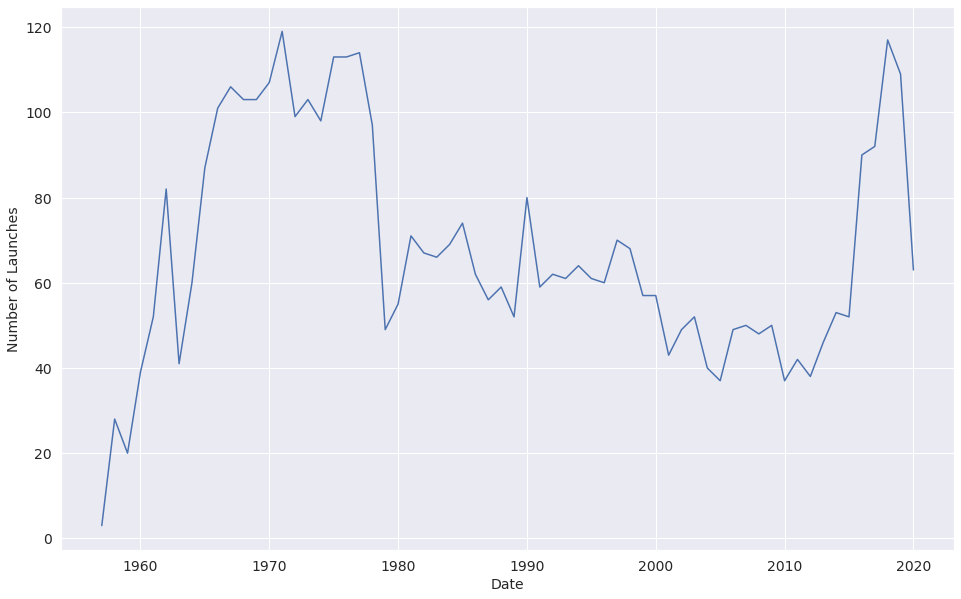

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.plot(df_year["Year"], df_year["Launches"])

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
df_data['Month'] = df_data['Date'].dt.month
df_data

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,1,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,1,CHN,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,1,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,1,KAZ,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,1,USA,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1,KAZ,1957,11


In [ ]:
df_month = df_data.groupby(['Year', 'Month'], as_index=False).count()
df_month

,Year,Month,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO
0,1957,10,1,1,1,1,1,1,0,1,1,1
1,1957,11,1,1,1,1,1,1,0,1,1,1
2,1957,12,1,1,1,1,1,1,0,1,1,1
3,1958,2,2,2,2,2,2,2,0,2,2,2
4,1958,3,3,3,3,3,3,3,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
742,2020,4,5,5,5,5,5,5,4,5,5,5
743,2020,5,9,9,9,9,9,9,6,9,9,9
744,2020,6,7,7,7,7,7,7,7,7,7,7
745,2020,7,14,14,14,14,14,14,12,14,14,14


In [ ]:
df_month['Date'] = pd.to_datetime(df_month[['Year', 'Month']].assign(Day=1))
df_month

,Year,Month,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO
0,1957,10,1,1,1,1957-10-01,1,1,0,1,1,1
1,1957,11,1,1,1,1957-11-01,1,1,0,1,1,1
2,1957,12,1,1,1,1957-12-01,1,1,0,1,1,1
3,1958,2,2,2,2,1958-02-01,2,2,0,2,2,2
4,1958,3,3,3,3,1958-03-01,3,3,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
742,2020,4,5,5,5,2020-04-01,5,5,4,5,5,5
743,2020,5,9,9,9,2020-05-01,9,9,6,9,9,9
744,2020,6,7,7,7,2020-06-01,7,7,7,7,7,7
745,2020,7,14,14,14,2020-07-01,14,14,12,14,14,14


In [ ]:
df_month["Rolling_Avg"] = df_month['Launches'].rolling(window=12).mean()
df_month

,Year,Month,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO,Rolling_Avg
0,1957,10,1,1,1,1957-10-01,1,1,0,1,1,1,NaN
1,1957,11,1,1,1,1957-11-01,1,1,0,1,1,1,NaN
2,1957,12,1,1,1,1957-12-01,1,1,0,1,1,1,NaN
3,1958,2,2,2,2,1958-02-01,2,2,0,2,2,2,NaN
4,1958,3,3,3,3,1958-03-01,3,3,0,3,3,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,2020,4,5,5,5,2020-04-01,5,5,4,5,5,5,9.17
743,2020,5,9,9,9,2020-05-01,9,9,6,9,9,9,9.17
744,2020,6,7,7,7,2020-06-01,7,7,7,7,7,7,9.17
745,2020,7,14,14,14,2020-07-01,14,14,12,14,14,14,9.42


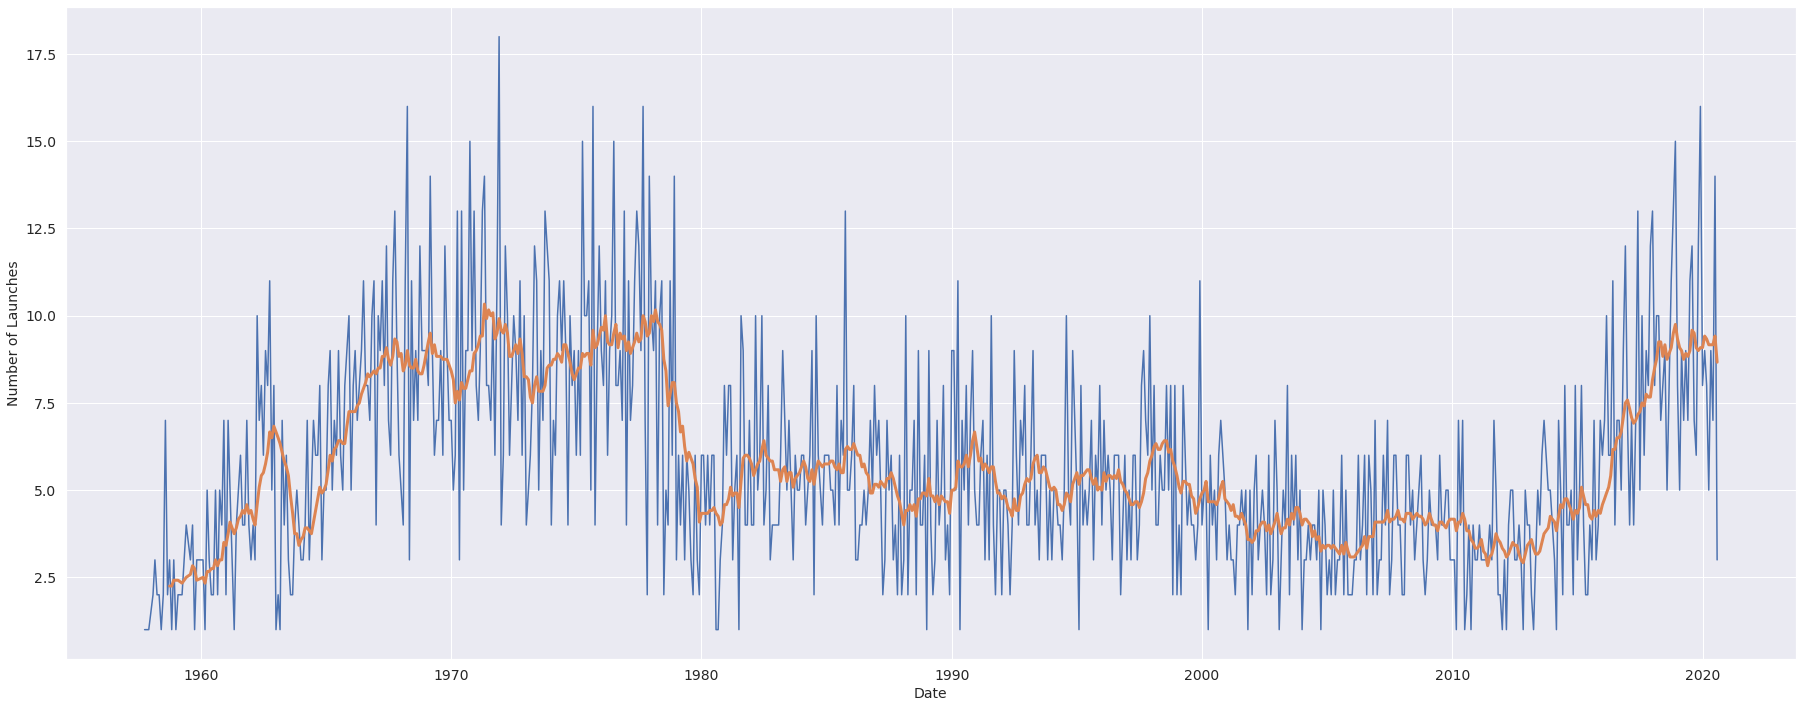

In [ ]:
plt.figure(figsize=(31,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.plot(df_month["Date"], df_month["Launches"])
plt.plot(df_month["Date"], df_month["Rolling_Avg"], linewidth=3)

In [ ]:
max_month = df_month['Launches'].max()
max_month

18

In [ ]:
df_month['Launches'].idxmax()

164

In [ ]:
df_month.loc[164]

Year                             1971
Month                              12
Organisation                       18
Location                           18
Country                            18
Date              1971-12-01 00:00:00
Detail                             18
Rocket_Status                      18
Price                               0
Mission_Status                     18
Launches                           18
ISO                                18
Rolling_Avg                      9.92
Name: 164, dtype: object

In [ ]:
print(f"The single month that had the most launches was December 1971 with {max_month} launches")

The single month that had the most launches was December 1971 with 18 launches


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
df_month_total = df_month.groupby(['Month'], as_index=False).sum()
df_month_total

,Month,Year,Organisation,Location,Country,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO,Rolling_Avg
0,1,119379,268,268,268,268,268,66,268,268,268,350.33
1,2,125307,336,336,336,336,336,60,336,336,336,357.67
2,3,123348,353,353,353,353,353,77,353,353,353,355.42
3,4,125307,383,383,383,383,383,91,383,383,383,358.00
4,5,123348,326,326,326,326,326,86,326,326,326,356.33
5,6,125307,402,402,402,402,402,85,402,402,402,359.42
6,7,123348,351,351,351,351,351,77,351,351,351,358.08
7,8,125307,373,373,373,373,373,82,373,373,373,360.75
8,9,123287,365,365,365,365,365,88,365,365,365,352.67
9,10,123231,381,381,381,381,381,83,381,381,381,351.08


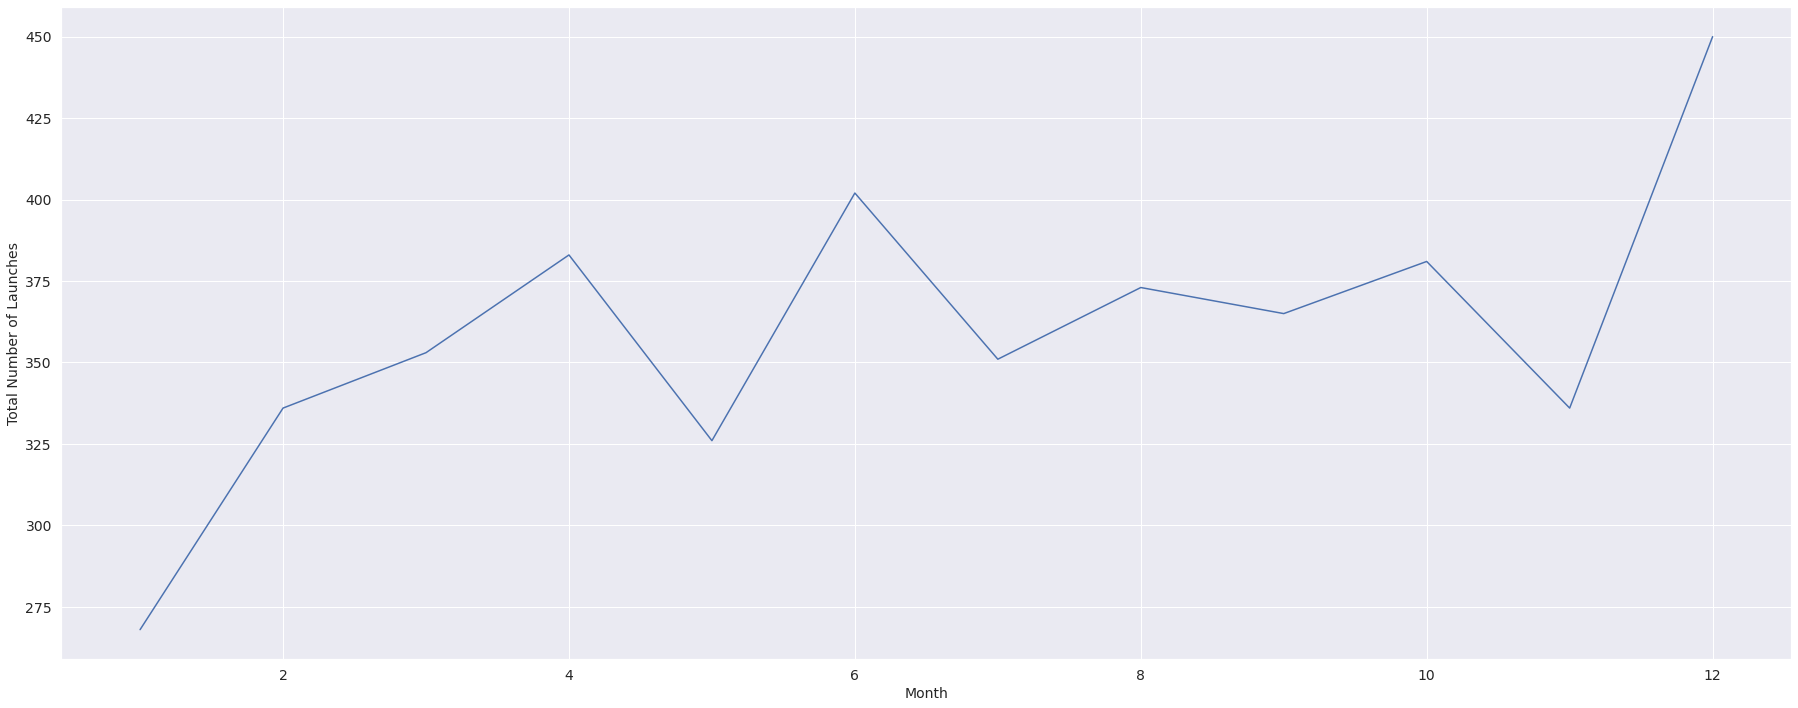

In [ ]:
plt.figure(figsize=(31,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Number of Launches', fontsize=14)
plt.plot(df_month_total["Month"], df_month_total["Launches"])
# plt.plot(df_month["Date"], df_month["Rolling_Avg"], linewidth=3)

In [ ]:
bar = px.bar(x=df_month_total['Launches'],
             y=df_month_total['Month'],
             orientation='h',
             labels=df_month_total['Month'],
             title="Total Launches by Month",
             color=df_month_total['Launches'],
             color_continuous_scale='Aggrnyl')
bar.update_layout(xaxis_title='Launches',
                  yaxis_title='Month',
                  coloraxis_showscale=False,
                  autosize=False,
                  width=1800,
                  height=900,
                  )

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500,
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),

bar.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
# df_price_time = df_data

df_price_time = df_data[df_data['Price'] != 'nan']
df_price_time = df_price_time.dropna()
print(df_total_price.isna().values.any())
# Because the price column is an object type (String) it doesn't drop the nan values because they are the string "nan"

df_price_time['Price'] = df_price_time['Price'].astype(str).str.replace(",", "")
df_price_time['Price'] = pd.to_numeric(df_price_time['Price'])
df_price_time.info()

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    964 non-null    object             
 1   Location        964 non-null    object             
 2   Country         964 non-null    object             
 3   Date            964 non-null    datetime64[ns, UTC]
 4   Detail          964 non-null    object             
 5   Rocket_Status   964 non-null    object             
 6   Price           964 non-null    float64            
 7   Mission_Status  964 non-null    object             
 8   Launches        964 non-null    int64              
 9   ISO             964 non-null    object             
 10  Year            964 non-null    int64              
 11  Month           964 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(7)
memory usage: 97.9+ KB


In [ ]:
df_price_time

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,1,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,1,CHN,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,1,KAZ,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,1,USA,2020,7
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",China,2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,1,CHN,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",USA,1966-07-29 18:43:00+00:00,Titan IIIB | KH-8,StatusRetired,59.00,Success,1,USA,1966,7
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",USA,1965-05-06 15:00:00+00:00,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,1,USA,1965,5
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",USA,1965-02-11 15:19:00+00:00,Titan IIIA | LES 1,StatusRetired,63.23,Success,1,USA,1965,2
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",USA,1964-12-10 16:52:00+00:00,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,1,USA,1964,12


In [ ]:
df_price_time = df_price_time.groupby(['Year', 'Month'], as_index=False).sum()
df_price_time

,Year,Month,Price,Launches
0,1964,9,63.23,1
1,1964,12,63.23,1
2,1965,2,63.23,1
3,1965,5,63.23,1
4,1966,7,59.00,1
...,...,...,...,...
383,2020,4,176.15,4
384,2020,5,329.55,6
385,2020,6,247.20,7
386,2020,7,668.56,12


In [ ]:
df_price_time['Avg_Price'] = df_price_time['Price'] / df_price_time['Launches']
df_price_time

,Year,Month,Price,Launches,Avg_Price
0,1964,9,63.23,1,63.23
1,1964,12,63.23,1,63.23
2,1965,2,63.23,1,63.23
3,1965,5,63.23,1,63.23
4,1966,7,59.00,1,59.00
...,...,...,...,...,...
383,2020,4,176.15,4,44.04
384,2020,5,329.55,6,54.93
385,2020,6,247.20,7,35.31
386,2020,7,668.56,12,55.71


In [ ]:
df_price_time['Date'] = pd.to_datetime(df_price_time[['Year', 'Month']].assign(Day=1))
df_price_time

,Year,Month,Price,Launches,Avg_Price,Date
0,1964,9,63.23,1,63.23,1964-09-01
1,1964,12,63.23,1,63.23,1964-12-01
2,1965,2,63.23,1,63.23,1965-02-01
3,1965,5,63.23,1,63.23,1965-05-01
4,1966,7,59.00,1,59.00,1966-07-01
...,...,...,...,...,...,...
383,2020,4,176.15,4,44.04,2020-04-01
384,2020,5,329.55,6,54.93,2020-05-01
385,2020,6,247.20,7,35.31,2020-06-01
386,2020,7,668.56,12,55.71,2020-07-01


In [ ]:
df_price_time["Rolling_Avg"] = df_price_time['Avg_Price'].rolling(window=12).mean()
df_price_time

,Year,Month,Price,Launches,Avg_Price,Date,Rolling_Avg
0,1964,9,63.23,1,63.23,1964-09-01,NaN
1,1964,12,63.23,1,63.23,1964-12-01,NaN
2,1965,2,63.23,1,63.23,1965-02-01,NaN
3,1965,5,63.23,1,63.23,1965-05-01,NaN
4,1966,7,59.00,1,59.00,1966-07-01,NaN
...,...,...,...,...,...,...,...
383,2020,4,176.15,4,44.04,2020-04-01,57.64
384,2020,5,329.55,6,54.93,2020-05-01,58.63
385,2020,6,247.20,7,35.31,2020-06-01,56.27
386,2020,7,668.56,12,55.71,2020-07-01,56.85


In [ ]:
# df_price_time = df_data

df_price_time_year = df_data[df_data['Price'] != 'nan']
df_price_time_year = df_price_time_year.dropna()
print(f"Are there ana nan values? {df_total_price.isna().values.any()}")
# Because the price column is an object type (String) it doesn't drop the nan values because they are the string "nan"

df_price_time_year['Price'] = df_price_time_year['Price'].astype(str).str.replace(",", "")
df_price_time_year['Price'] = pd.to_numeric(df_price_time_year['Price'])
print(df_price_time_year.info())

df_price_time_year = df_price_time_year.groupby(['Year'], as_index=False).sum()
df_price_time_year['Avg_Price'] = df_price_time_year['Price'] / df_price_time_year['Launches']
df_price_time_year['Date'] = pd.to_datetime(df_price_time_year[['Year']].assign(Month=1, Day=1))
df_price_time_year["Rolling_Avg"] = df_price_time_year['Avg_Price'].rolling(window=5).mean()
df_price_time_year

Are there ana nan values? False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    964 non-null    object             
 1   Location        964 non-null    object             
 2   Country         964 non-null    object             
 3   Date            964 non-null    datetime64[ns, UTC]
 4   Detail          964 non-null    object             
 5   Rocket_Status   964 non-null    object             
 6   Price           964 non-null    float64            
 7   Mission_Status  964 non-null    object             
 8   Launches        964 non-null    int64              
 9   ISO             964 non-null    object             
 10  Year            964 non-null    int64              
 11  Month           964 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(7)


,Year,Price,Launches,Month,Avg_Price,Date,Rolling_Avg
0,1964,126.46,2,21,63.23,1964-01-01,NaN
1,1965,126.46,2,7,63.23,1965-01-01,NaN
2,1966,177.00,3,28,59.00,1966-01-01,NaN
3,1967,"1,573.00",8,62,196.62,1967-01-01,NaN
4,1968,"2,792.00",10,69,279.20,1968-01-01,132.26
5,1969,"4,876.00",8,40,609.50,1969-01-01,241.51
6,1970,"1,160.00",1,4,"1,160.00",1970-01-01,460.86
7,1971,"2,320.00",2,8,"1,160.00",1971-01-01,681.06
8,1972,"2,320.00",2,16,"1,160.00",1972-01-01,873.74
9,1973,"1,160.00",1,5,"1,160.00",1973-01-01,"1,049.90"


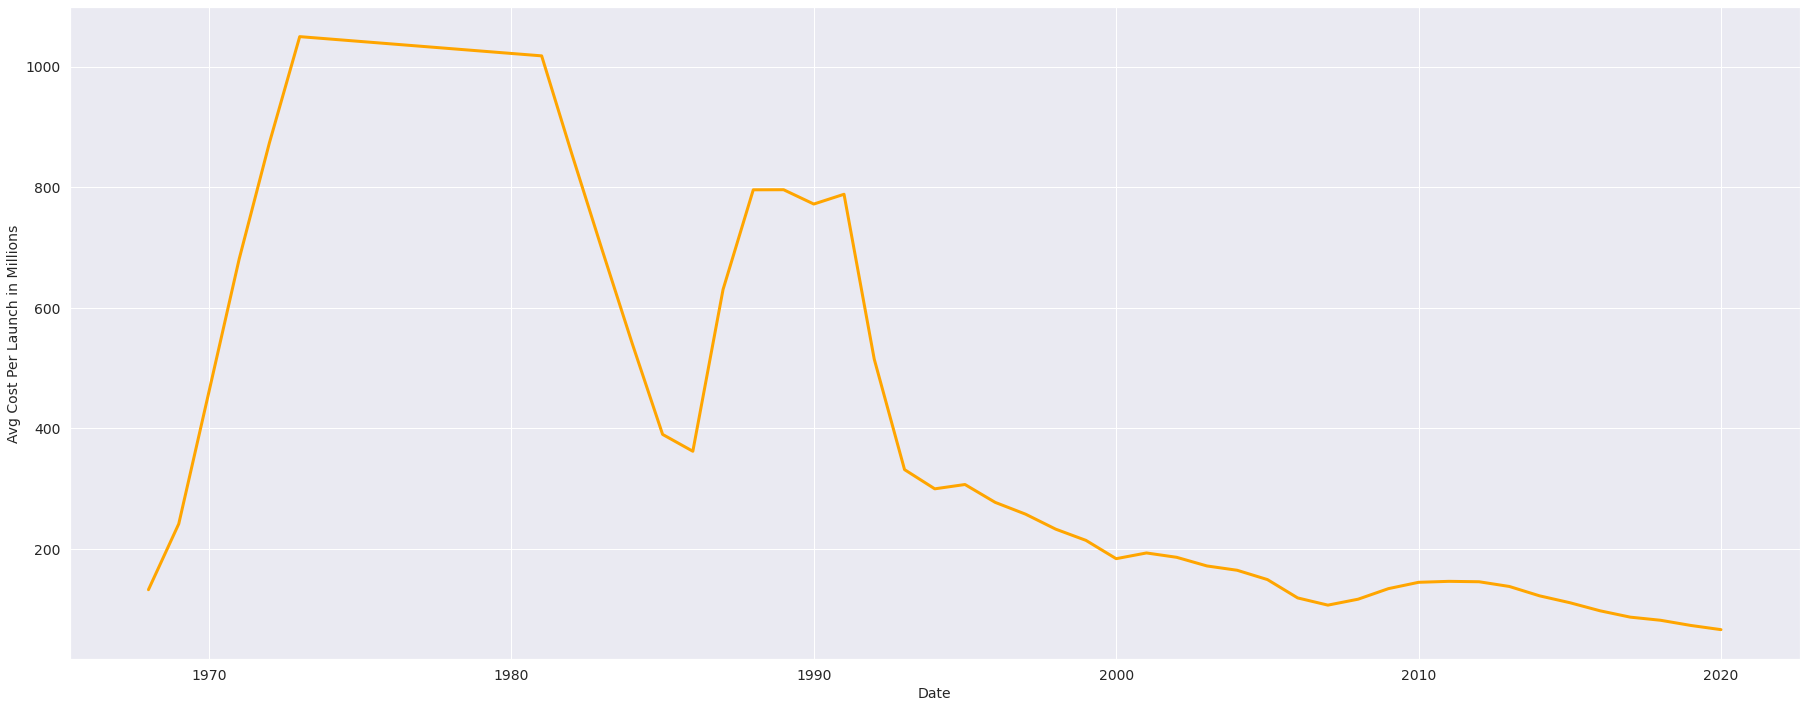

In [ ]:
plt.figure(figsize=(31,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Avg Cost Per Launch in Millions', fontsize=14)
# plt.plot(df_price_time["Date"], df_price_time["Avg_Price"], color = "blue")
# plt.plot(df_price_time["Date"], df_price_time["Rolling_Avg"], color = "purple", linewidth=3)

# plt.plot(df_price_time_year["Date"], df_price_time_year["Avg_Price"], color = "red")
plt.plot(df_price_time_year["Date"], df_price_time_year["Rolling_Avg"], color = "orange", linewidth=3)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
launches_org = df_data.groupby('Organisation', as_index=False).sum()
launches_org = launches_org.sort_values("Launches", ascending=False).head(10)
print(launches_org)
top_10_list = launches_org["Organisation"].tolist() # launches_org.head(10)
top_10_list

        Organisation     Price  Launches     Year  Month
40         RVSN USSR 10,000.00      1777  3510112  11993
3        Arianespace 16,345.00       279   558978   1982
17  General Dynamics      0.00       251   495052   1703
7               CASC  6,340.26       251   503678   1865
35              NASA 76,280.00       203   403018   1345
52            VKS RF  1,548.90       201   402361   1509
49      US Air Force  1,550.92       161   316300   1098
48               ULA 14,798.00       140   281784    928
6             Boeing  1,241.00       136   271647    880
34   Martin Marietta    721.40       114   225627    765


['RVSN USSR',
 'Arianespace',
 'General Dynamics',
 'CASC',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [ ]:
type(top_10_list)

list

In [ ]:
df_launches_org = df_data
df_launches_org = df_launches_org.groupby(['Year', 'Organisation'], as_index=False).sum()
df_launches_org['Date'] = pd.to_datetime(df_launches_org[['Year']].assign(Month=1, Day=1))
df_launches_org = df_launches_org[df_launches_org["Organisation"].isin(top_10_list)]
df_launches_org['Organisation'].value_counts()

CASC                47
NASA                46
RVSN USSR           39
General Dynamics    37
Arianespace         37
Martin Marietta     30
VKS RF              29
US Air Force        25
Boeing              18
ULA                 15
Name: Organisation, dtype: int64

In [ ]:
reshaped_df = df_launches_org.pivot(index="Date", columns='Organisation', values="Launches")
reshaped_df.fillna(0, inplace=True)
print(reshaped_df.shape)
print(reshaped_df.isna().values.any())
reshaped_df

(64, 10)
False


Organisation,Arianespace,Boeing,CASC,General Dynamics,Martin Marietta,NASA,RVSN USSR,ULA,US Air Force,VKS RF
Date,,,,,,,,,,
1957-01-01,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00
1958-01-01,0.00,0.00,0.00,0.00,0.00,2.00,5.00,0.00,2.00,0.00
1959-01-01,0.00,0.00,0.00,1.00,0.00,1.00,4.00,0.00,10.00,0.00
1960-01-01,0.00,0.00,0.00,5.00,0.00,4.00,9.00,0.00,21.00,0.00
1961-01-01,0.00,0.00,0.00,8.00,0.00,12.00,9.00,0.00,23.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2016-01-01,11.00,0.00,22.00,0.00,0.00,0.00,0.00,12.00,0.00,4.00
2017-01-01,11.00,0.00,16.00,0.00,0.00,0.00,0.00,8.00,0.00,6.00
2018-01-01,11.00,0.00,37.00,0.00,0.00,0.00,0.00,8.00,0.00,5.00


Text(0.5, 1.0, 'Total Launches by Organisation For Each Year')

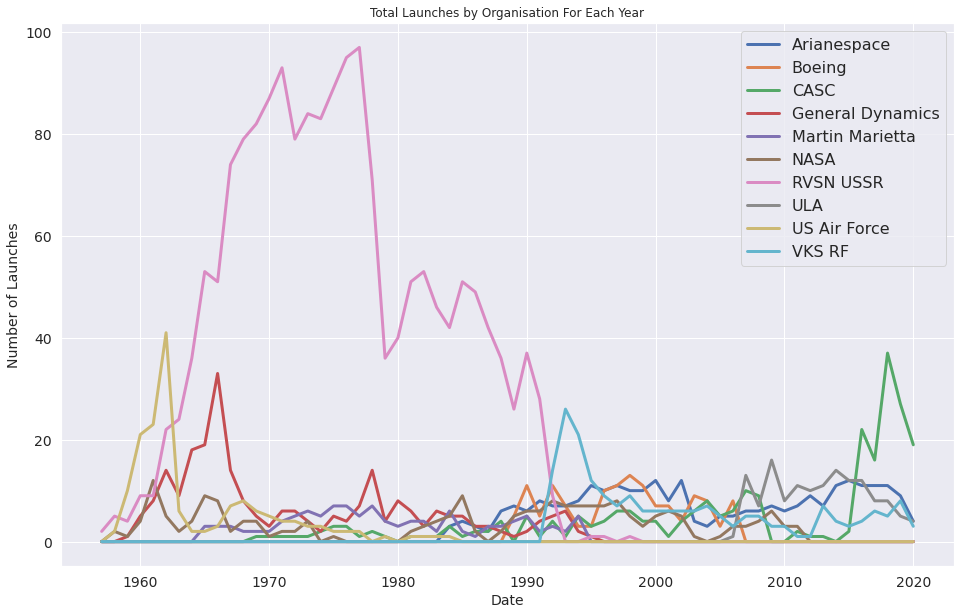

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
# plt.ylim(0, 35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
  plt.legend(fontsize=16)
plt.title("Total Launches by Organisation For Each Year")

In [ ]:
df_data

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,1,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,1,CHN,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,1,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,1,KAZ,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,1,USA,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1,KAZ,1957,11


In [ ]:
launch_by_year = df_data.groupby(by=['Organisation', 'Year'], as_index=False).sum()
launch_by_year = launch_by_year.sort_values('Year')[['Year', 'Organisation', 'Launches']]
# launch_by_year
cumulative_launches = launch_by_year.groupby(by=['Organisation', 'Year']).sum().groupby(level=[0]).cumsum()
cumulative_launches.reset_index(inplace=True)
cumulative_launches

,Organisation,Year,Launches
0,AEB,1997,1
1,AEB,1999,2
2,AEB,2003,3
3,AMBA,1958,7
4,AMBA,1967,8
...,...,...,...
658,VKS RF,2020,201
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,2


In [ ]:
fig = px.line(cumulative_launches,
        x='Year',
        y='Launches',
        color='Organisation',
        hover_name='Organisation',
        title='Cumulative Launches by Organisation')
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
cold_war_df = df_data.replace('Kazakhstan', 'Russia')
cold_war_df['Country'].value_counts()

Russia           2099
USA              1351
France            303
China             269
Japan             126
India              76
Pacific Ocean      36
Iran               14
New Zealand        13
Israel             11
Kenya               9
Australia           6
North Korea         5
South Korea         3
Brazil              3
Name: Country, dtype: int64

In [ ]:
cold_war_df = cold_war_df[cold_war_df['Country'].str.contains("USA|Russia")==True]
cold_war_df["Country"].value_counts()

Russia    2099
USA       1351
Name: Country, dtype: int64

In [ ]:
cold_war_df

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,1,USA,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,1,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Russia,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,1,KAZ,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,1,USA,2020,7
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Russia,2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,1,KAZ,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Russia,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1,KAZ,1957,11


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
cold_war_launches = cold_war_df.sort_values('Year')[['Year', 'Country', 'Launches']]
cold_war_launches

,Year,Country,Launches
4323,1957,Russia,1
4322,1957,Russia,1
4321,1957,USA,1
4320,1958,USA,1
4293,1958,USA,1
...,...,...,...
56,2020,USA,1
57,2020,USA,1
62,2020,USA,1
34,2020,USA,1


In [ ]:
cold_war_total_launches = cold_war_launches.groupby("Country")[['Country', 'Launches']].sum()
cold_war_total_launches

,Launches
Country,
Russia,2099
USA,1351


In [ ]:
fig = px.pie(labels=cold_war_total_launches.index,
             values=cold_war_total_launches["Launches"],
             title = "Total Launches during Cold War by Country",
             names = cold_war_total_launches.index)
fig.update_traces(textposition='outside', textinfo='percent+label') # for pie graph
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
df_launches_org

,Year,Organisation,Price,Launches,Month,Date
0,1957,RVSN USSR,0.00,2,21,1957-01-01
3,1958,NASA,0.00,2,21,1958-01-01
4,1958,RVSN USSR,0.00,5,40,1958-01-01
5,1958,US Air Force,0.00,2,20,1958-01-01
7,1959,General Dynamics,0.00,1,11,1959-01-01
...,...,...,...,...,...,...
646,2019,VKS RF,229.10,8,68,2019-01-01
648,2020,Arianespace,497.00,4,8,2020-01-01
649,2020,CASC,520.51,19,93,2020-01-01
660,2020,ULA,533.00,4,17,2020-01-01


In [ ]:
cold_war_df

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,1,USA,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,1,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Russia,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,1,KAZ,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,1,USA,2020,7
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Russia,2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,1,KAZ,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Russia,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1,KAZ,1957,11


In [ ]:
# df_launches_org = df_data
# df_launches_org = df_launches_org.groupby(['Year', 'Organisation'], as_index=False).sum()
# df_launches_org['Date'] = pd.to_datetime(df_launches_org[['Year']].assign(Month=1, Day=1))
# df_launches_org = df_launches_org[df_launches_org["Organisation"].isin(top_10_list)]
# df_launches_org['Organisation'].value_counts()


cold_war_launches = cold_war_df
cold_war_launches = cold_war_launches.groupby(['Year', 'Country'], as_index=False).sum()
# cold_war_launches['Date'] = pd.to_datetime(df_launches_org[['Year']].assign(Month=1, Day=1))
# cold_war_launches = df_launches_org[df_launches_org["Organisation"].isin(top_10_list)]
cold_war_launches['Country'].value_counts()

cold_war_launches

,Year,Country,Price,Launches,Month
0,1957,Russia,0.00,2,21
1,1957,USA,0.00,1,12
2,1958,Russia,0.00,5,40
3,1958,USA,0.00,23,162
4,1959,Russia,0.00,4,26
...,...,...,...,...,...
123,2018,USA,"2,405.00",34,206
124,2019,Russia,748.10,22,172
125,2019,USA,"1,607.00",27,176
126,2020,Russia,356.00,9,37


In [ ]:
cold_war_launches = cold_war_launches.pivot(index="Year", columns='Country', values="Launches")
cold_war_launches.fillna(0, inplace=True)
print(cold_war_launches.shape)
print(cold_war_launches.isna().values.any())
cold_war_launches


# reshaped_df = df_launches_org.pivot(index="Date", columns='Organisation', values="Launches")
# reshaped_df.fillna(0, inplace=True)
# print(reshaped_df.shape)
# print(reshaped_df.isna().values.any())
# reshaped_df

# .groupby(by=['Country', 'Year']).sum().groupby(level=[0]).cumsum()
# cold_war_cumulative_launches.reset_index(inplace=True)
# cold_war_launches

(64, 2)
False


Country,Russia,USA
Year,,
1957,2,1
1958,5,23
1959,4,16
1960,9,30
1961,9,43
...,...,...
2016,17,27
2017,19,30
2018,17,34


Text(0.5, 1.0, 'Total Launches by Organisation For Each Year')

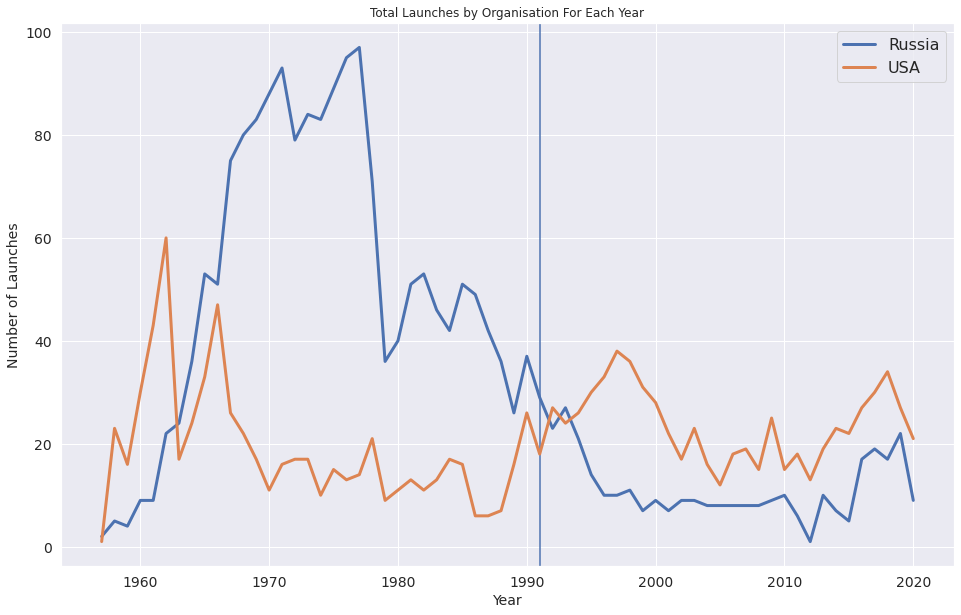

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
# plt.ylim(0, 35000)
plt.axvline(x=1991)
for column in cold_war_launches.columns:
  plt.plot(cold_war_launches.index, cold_war_launches[column], linewidth=3, label=cold_war_launches[column].name)
  plt.legend(fontsize=16)
plt.title("Total Launches by Organisation For Each Year")

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
cold_war_failures = cold_war_df[cold_war_df["Mission_Status"] != "Success"]
cold_war_failures = cold_war_failures.groupby(by=['Country', 'Year'], as_index=False).sum()
cold_war_failures = cold_war_failures.sort_values('Year')[['Year', 'Country', 'Launches']]
cold_war_failures = cold_war_failures.groupby(by=['Country', 'Year']).sum().groupby(level=[0]).cumsum()
cold_war_failures.reset_index(inplace=True)
cold_war_failures

,Country,Year,Launches
0,Russia,1958,4
1,Russia,1959,6
2,Russia,1960,12
3,Russia,1961,16
4,Russia,1962,23
...,...,...,...
95,USA,2015,157
96,USA,2016,158
97,USA,2018,159
98,USA,2019,162


In [ ]:
fig = px.line(cold_war_failures,
        x='Year',
        y='Launches',
        color='Country',
        hover_name='Country',
        title='Cumulative Failed Launches by Country During Cold War')
fig.add_vline(x=1991)
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
cold_war_failure_rate = cold_war_df.replace('Partial Failure', 'Failure')
cold_war_failure_rate = cold_war_failure_rate.replace('Prelaunch Failure', 'Failure')
cold_war_failure_rate["Mission_Status"].value_counts()

Success    3101
Failure     349
Name: Mission_Status, dtype: int64

In [ ]:
cold_war_failure_rate["Fails"] = ["1" if ele  == "Failure" else "0" for ele in cold_war_failure_rate["Mission_Status"]]
cold_war_failure_rate["Fails"] = pd.to_numeric(cold_war_failure_rate["Fails"], errors='coerce')
cold_war_failure_rate

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status,Launches,ISO,Year,Month,Fails
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,1,USA,2020,8,0
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,1,USA,2020,8,0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Russia,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,1,KAZ,2020,7,0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,1,USA,2020,7,0
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Russia,2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,1,KAZ,2020,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1,USA,1958,2,1
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1,USA,1958,2,0
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1,USA,1957,12,1
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Russia,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1,KAZ,1957,11,0


In [ ]:
cold_war_failure_rate = cold_war_failure_rate.groupby(by=['Country', 'Year'], as_index=False).sum()
cold_war_failure_rate = cold_war_failure_rate.sort_values('Year')[['Year', 'Country', 'Launches', "Fails"]]
cold_war_failure_rate["Fail_Rate"] = cold_war_failure_rate['Fails'] / cold_war_failure_rate['Launches'] * 100
cold_war_failure_rate

,Year,Country,Launches,Fails,Fail_Rate
0,1957,Russia,2,0,0.00
64,1957,USA,1,1,100.00
65,1958,USA,23,18,78.26
1,1958,Russia,5,4,80.00
2,1959,Russia,4,2,50.00
...,...,...,...,...,...
61,2018,Russia,17,1,5.88
126,2019,USA,27,3,11.11
62,2019,Russia,22,0,0.00
63,2020,Russia,9,0,0.00


In [ ]:
fig = px.line(cold_war_failure_rate,
        x='Year',
        y='Fail_Rate',
        color='Country',
        hover_name='Country',
        title='Annual Failure Rate by Country During Cold War')
fig.add_vline(x=1991)
fig.show()

In [ ]:
cold_war_russ_rolling = cold_war_failure_rate[cold_war_failure_rate["Country"] == "Russia"]
cold_war_russ_rolling["Rolling_Launches"] = cold_war_russ_rolling['Launches'].rolling(window=5).mean()
cold_war_russ_rolling["Rolling_Fails"] = cold_war_russ_rolling['Fails'].rolling(window=5).mean()
cold_war_russ_rolling["Rolling_Avg"] = cold_war_russ_rolling['Rolling_Fails'] / cold_war_russ_rolling['Rolling_Launches'] * 100
cold_war_russ_rolling

<ipython-input-230-0cc6ae5ed64c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-230-0cc6ae5ed64c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-230-0cc6ae5ed64c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Country,Launches,Fails,Fail_Rate,Rolling_Launches,Rolling_Fails,Rolling_Avg
0,1957,Russia,2,0,0.00,NaN,NaN,NaN
1,1958,Russia,5,4,80.00,NaN,NaN,NaN
2,1959,Russia,4,2,50.00,NaN,NaN,NaN
3,1960,Russia,9,6,66.67,NaN,NaN,NaN
4,1961,Russia,9,4,44.44,5.80,3.20,55.17
...,...,...,...,...,...,...,...,...
59,2016,Russia,17,1,5.88,8.00,0.80,10.00
60,2017,Russia,19,2,10.53,11.60,1.20,10.34
61,2018,Russia,17,1,5.88,13.00,1.00,7.69
62,2019,Russia,22,0,0.00,16.00,1.00,6.25


In [ ]:
cold_war_usa_rolling = cold_war_failure_rate[cold_war_failure_rate["Country"] == "USA"]
cold_war_usa_rolling["Rolling_Launches"] = cold_war_usa_rolling['Launches'].rolling(window=5).mean()
cold_war_usa_rolling["Rolling_Fails"] = cold_war_usa_rolling['Fails'].rolling(window=5).mean()
cold_war_usa_rolling["Rolling_Avg"] = cold_war_usa_rolling['Rolling_Fails'] / cold_war_usa_rolling['Rolling_Launches'] * 100
cold_war_usa_rolling

<ipython-input-231-5e6b96c58b8f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-231-5e6b96c58b8f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-231-5e6b96c58b8f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Country,Launches,Fails,Fail_Rate,Rolling_Launches,Rolling_Fails,Rolling_Avg
64,1957,USA,1,1,100.00,NaN,NaN,NaN
65,1958,USA,23,18,78.26,NaN,NaN,NaN
66,1959,USA,16,10,62.50,NaN,NaN,NaN
67,1960,USA,30,14,46.67,NaN,NaN,NaN
68,1961,USA,43,16,37.21,22.60,11.80,52.21
...,...,...,...,...,...,...,...,...
123,2016,USA,27,1,3.70,20.80,1.00,4.81
124,2017,USA,30,0,0.00,24.20,0.80,3.31
125,2018,USA,34,1,2.94,27.20,1.00,3.68
126,2019,USA,27,3,11.11,28.00,1.40,5.00


In [ ]:
fig = px.line(cold_war_russ_rolling,
        x='Year',
        y='Rolling_Avg',
        color='Country',
        hover_name='Country',
        title='Rolling Avg Annual Failure Rate by Country During Cold War')
fig.add_scatter(x=cold_war_usa_rolling['Year'], y=cold_war_usa_rolling["Rolling_Avg"], mode="lines", name="USA - Rolling Average")
fig.add_vline(x=1991)
fig.show()

In [ ]:
cold_war_failure_rate = cold_war_failure_rate.groupby(by=['Country', 'Year']).sum().groupby(level=[0]).cumsum()
cold_war_failure_rate.reset_index(inplace=True)
cold_war_failure_rate

,Country,Year,Launches,Fails,Fail_Rate
0,Russia,1957,2,0,0.00
1,Russia,1958,7,4,80.00
2,Russia,1959,11,6,130.00
3,Russia,1960,20,12,196.67
4,Russia,1961,29,16,241.11
...,...,...,...,...,...
123,USA,2016,1239,158,803.45
124,USA,2017,1269,158,803.45
125,USA,2018,1303,159,806.39
126,USA,2019,1330,162,817.50


In [ ]:
cold_war_failure_rate["Fail_Rate"] = cold_war_failure_rate['Fails'] / cold_war_failure_rate['Launches'] * 100
cold_war_failure_rate

,Country,Year,Launches,Fails,Fail_Rate
0,Russia,1957,2,0,0.00
1,Russia,1958,7,4,57.14
2,Russia,1959,11,6,54.55
3,Russia,1960,20,12,60.00
4,Russia,1961,29,16,55.17
...,...,...,...,...,...
123,USA,2016,1239,158,12.75
124,USA,2017,1269,158,12.45
125,USA,2018,1303,159,12.20
126,USA,2019,1330,162,12.18


In [ ]:
fig = px.line(cold_war_failure_rate,
        x='Year',
        y='Fail_Rate',
        color='Country',
        hover_name='Country',
        title='Cumulative Failure Rate by Country During Cold War')
fig.add_vline(x=1991)
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
cold_war_cumulative_launches = cold_war_df.groupby(by=['Country', 'Year']).sum().groupby(level=[0]).cumsum()
cold_war_cumulative_launches.reset_index(inplace=True)
cold_war_cumulative_launches

,Country,Year,Price,Launches,Month
0,Russia,1957,0.00,2,21
1,Russia,1958,0.00,7,61
2,Russia,1959,0.00,11,87
3,Russia,1960,0.00,20,159
4,Russia,1961,0.00,29,215
...,...,...,...,...,...
123,USA,2016,"97,953.32",1239,8236
124,USA,2017,"99,949.32",1269,8449
125,USA,2018,"102,354.32",1303,8655
126,USA,2019,"103,961.32",1330,8831


In [ ]:
fig = px.line(cold_war_cumulative_launches,
        x='Year',
        y='Launches',
        color='Country',
        hover_name='Country',
        title='Cumulative Launches During Cold War')
fig.add_vline(x=1991)
fig.show()

In [ ]:
cold_war_cum_success = cold_war_df[cold_war_df['Mission_Status'] == 'Success']
cold_war_cum_success = cold_war_cum_success.groupby(by=['Country', 'Year']).sum().groupby(level=[0]).cumsum()
cold_war_cum_success.reset_index(inplace=True)
cold_war_cum_success

,Country,Year,Price,Launches,Month
0,Russia,1957,0.00,2,21
1,Russia,1958,0.00,3,26
2,Russia,1959,0.00,5,45
3,Russia,1960,0.00,8,70
4,Russia,1961,0.00,13,90
...,...,...,...,...,...
122,USA,2016,"94,432.49",1081,7159
123,USA,2017,"96,428.49",1111,7372
124,USA,2018,"98,833.49",1144,7570
125,USA,2019,"100,440.49",1168,7727


In [ ]:
fig = px.line(cold_war_cum_success,
        x='Year',
        y='Launches',
        color='Country',
        hover_name='Country',
        title='Cumulative Successful Launches During Cold War')
fig.add_vline(x=1991)
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
launches_org = df_data.groupby('Organisation', as_index=False).sum()
launches_org = launches_org.sort_values("Launches", ascending=False).head(10)
print(launches_org)
top_10_list = launches_org["Organisation"].tolist() # launches_org.head(10)
top_10_list

type(top_10_list)

df_launches_org = df_data
df_launches_org = df_launches_org.groupby(['Year', 'Organisation'], as_index=False).sum()
df_launches_org['Date'] = pd.to_datetime(df_launches_org[['Year']].assign(Month=1, Day=1))
df_launches_org = df_launches_org[df_launches_org["Organisation"].isin(top_10_list)]
df_launches_org['Organisation'].value_counts()

reshaped_df = df_launches_org.pivot(index="Year", columns='Organisation', values="Launches")
reshaped_df.fillna(0, inplace=True)
print(reshaped_df.shape)
print(reshaped_df.isna().values.any())
reshaped_df

        Organisation     Price  Launches     Year  Month
40         RVSN USSR 10,000.00      1777  3510112  11993
3        Arianespace 16,345.00       279   558978   1982
17  General Dynamics      0.00       251   495052   1703
7               CASC  6,340.26       251   503678   1865
35              NASA 76,280.00       203   403018   1345
52            VKS RF  1,548.90       201   402361   1509
49      US Air Force  1,550.92       161   316300   1098
48               ULA 14,798.00       140   281784    928
6             Boeing  1,241.00       136   271647    880
34   Martin Marietta    721.40       114   225627    765
(64, 10)
False


Organisation,Arianespace,Boeing,CASC,General Dynamics,Martin Marietta,NASA,RVSN USSR,ULA,US Air Force,VKS RF
Year,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00
1958,0.00,0.00,0.00,0.00,0.00,2.00,5.00,0.00,2.00,0.00
1959,0.00,0.00,0.00,1.00,0.00,1.00,4.00,0.00,10.00,0.00
1960,0.00,0.00,0.00,5.00,0.00,4.00,9.00,0.00,21.00,0.00
1961,0.00,0.00,0.00,8.00,0.00,12.00,9.00,0.00,23.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2016,11.00,0.00,22.00,0.00,0.00,0.00,0.00,12.00,0.00,4.00
2017,11.00,0.00,16.00,0.00,0.00,0.00,0.00,8.00,0.00,6.00
2018,11.00,0.00,37.00,0.00,0.00,0.00,0.00,8.00,0.00,5.00


Text(0.5, 1.0, 'Total Launches by Organisation For Each Year')

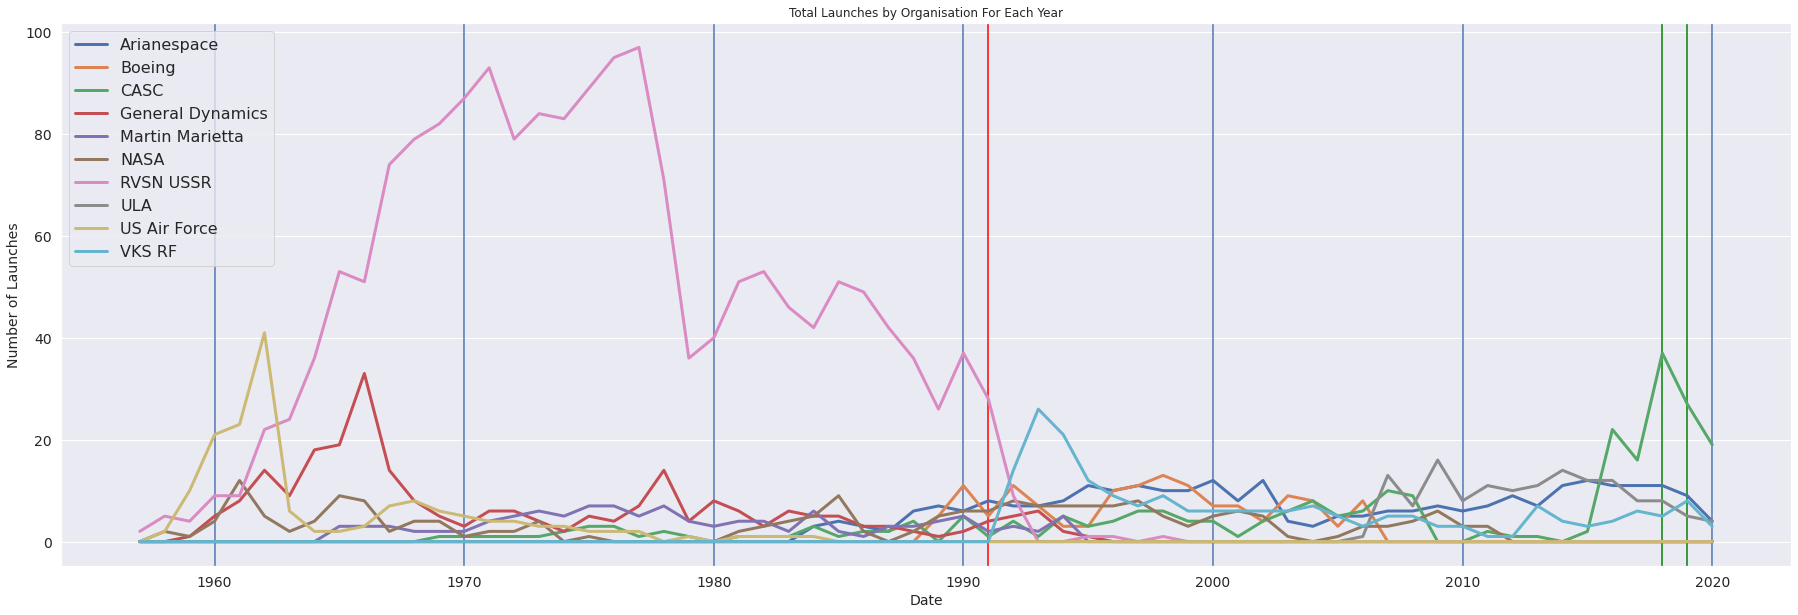

In [ ]:
# Graph with Matplotlib
plt.figure(figsize=(31,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
decades = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
for decade in decades:
  plt.axvline(x=decade)
plt.axvline(x=1991, color="red")
plt.axvline(x=2018, color="green")
plt.axvline(x=2019, color="green")
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
  plt.legend(fontsize=16)
plt.title("Total Launches by Organisation For Each Year")
